<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Perceptron</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 949ba3444a51980350889dcd60656a33739e7c3d

watermark : 2.1.0
matplotlib: 3.3.2
numpy     : 1.20.1
json      : 2.0.9



In [3]:
plt.style.use('./d4sci.mplstyle')

## Logic functions

Let's start by setting up our training examples. We'll consider the simple NOT operator

In [4]:
X_NOT = np.ones((2, 2), dtype='float')
X_NOT[0, 1] = 0

Here the inputs are just 0 and 1, along with a bias column

In [5]:
X_NOT

array([[1., 0.],
       [1., 1.]])

And the outputs are just 1 and 0, respectively.

In [6]:
y_NOT = [1, 0]

For the 2 point binary example for binary logic, we have one extra column:

In [7]:
X = np.ones((4, 3), dtype='float')
X[1, 2] = 0
X[2, 1] = 0
X[3, 1] = 0
X[3, 2] = 0

The first column is just the bias, always set to 1.

In [9]:
X

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.]])

We'll take a look at two examples, *AND* and *OR*

In [10]:
y_AND = [1, 0, 0, 0]
y_OR = [1, 1, 1, 0]

## Prediction and Training

The prediction function is simple. Just predict 1 if the activation value is larger than 0 and 0 otherwise

In [11]:
def predict(weights, inputs):
    return (np.dot(inputs, weights) > 0).astype('int').flatten()

The training algorithm is also simple:

- If the prediction is correct, do nothing
- If the prediction is wrong, add/subtract the input vector

In [12]:
def train(weights, X, y, epochs = 100):
    for _ in range(epochs):
        for i in range(len(y)):
            inputs = X[i, :]
            label = y[i]
            
            prediction = predict(weights, inputs)
            weights += (label - prediction) * inputs

## Perceptron

In the NOT case, our _perceptron_ is just a vector of 2 weights that we initialize to zero

In [13]:
weights_NOT = np.zeros(2)

Which can easily be trained

In [14]:
train(weights_NOT, X_NOT, y_NOT)

to find the weights

In [16]:
weights_NOT

array([ 1., -1.])

And we verify that it indeed does return the opposite value, as expected

In [17]:
np.dot(X_NOT, weights_NOT)==y_NOT

array([ True,  True])

For AND and OR operators with two inputs, we must consider a third weight:

In [18]:
weights_AND = np.zeros(3)
weights_OR = np.zeros(3)

We can train them both quickly, just as we did before

In [19]:
train(weights_AND, X, y_AND)
train(weights_OR, X, y_OR)

And take a look at the resulting weights

In [20]:
weights_AND

array([-2.,  1.,  2.])

In [21]:
weights_OR

array([0., 1., 1.])

## Visualization

Let's define some helper functions. First, one to draw the decision surface

In [22]:
def surface(weights, n=20):
    points = np.linspace(0, 1, n)
    xs = []
    ys = []
    zs = []
    
    for i in range(n):
        x = points[i]
        for j in range(n):
            y = points[j]
            
            point = [1, x, y]
            
            xs.append(x)
            ys.append(y)
            zs.append(np.dot(weights, point))
            
    return np.array(xs), np.array(ys), np.array(zs)

And a function to plot the perceptron output

In [24]:
def plot_output(weights, X, y, level=0, label='AND function'):
    font_size = plt.rcParams['font.size']
    plt.rcParams['font.size'] = 14
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs, ys, zs = surface(weights)

    colors = np.array(['blue']*xs.shape[0])
    selector = (zs>=-1) & (zs<=1)
    colors[zs>0] = 'red'
    
    ax.scatter(X[:, 1], X[:, 2], y, c='gold', marker='*', s=1000, depthshade=False)
    ax.scatter(xs[selector], ys[selector], zs[selector], s=75, c=colors[selector], marker='.')
    grids = np.linspace(0, 1, 6)
    
    for i in range(6):
        ax.plot([0, 1], [grids[i], grids[i]], [level, level], 'darkgray')
        ax.plot([grids[i], grids[i]], [0, 1], [level, level], 'darkgray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('output')
    ax.set_title(label)
    
    plt.rcParams['font.size'] = font_size

## AND Function

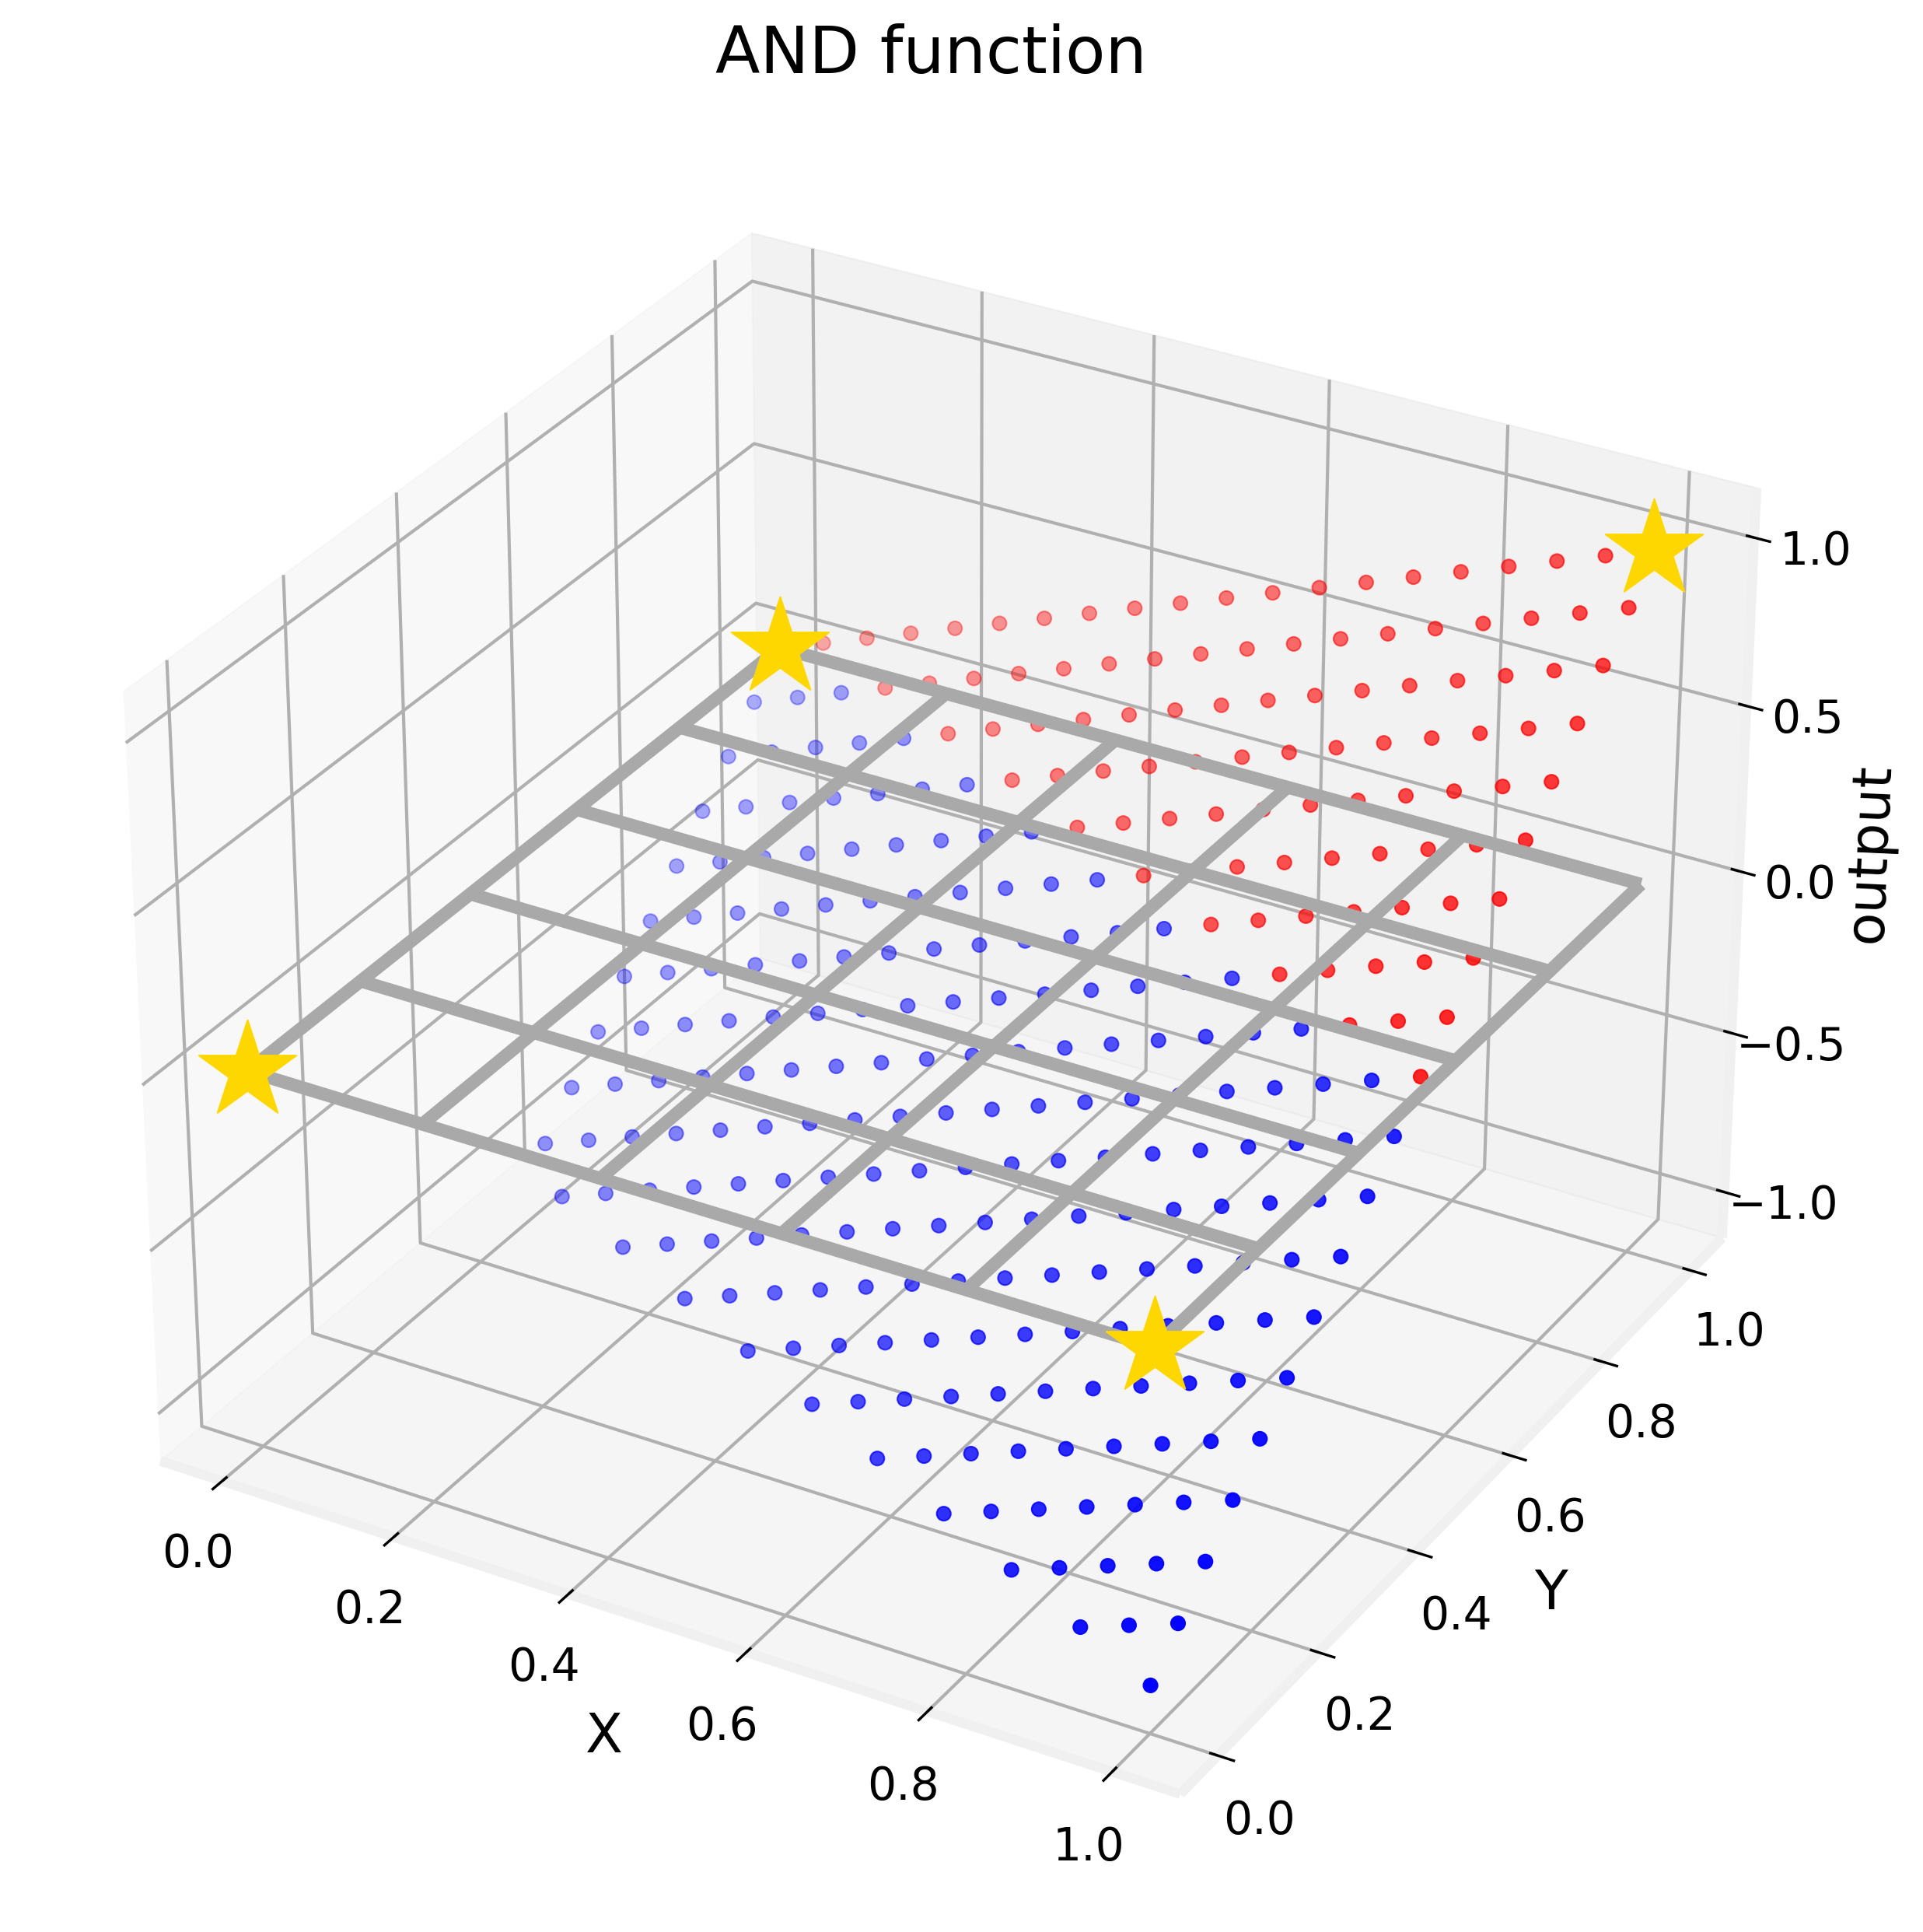

In [25]:
plot_output(weights_AND, X, y_AND, 0, 'AND function')

## OR Function

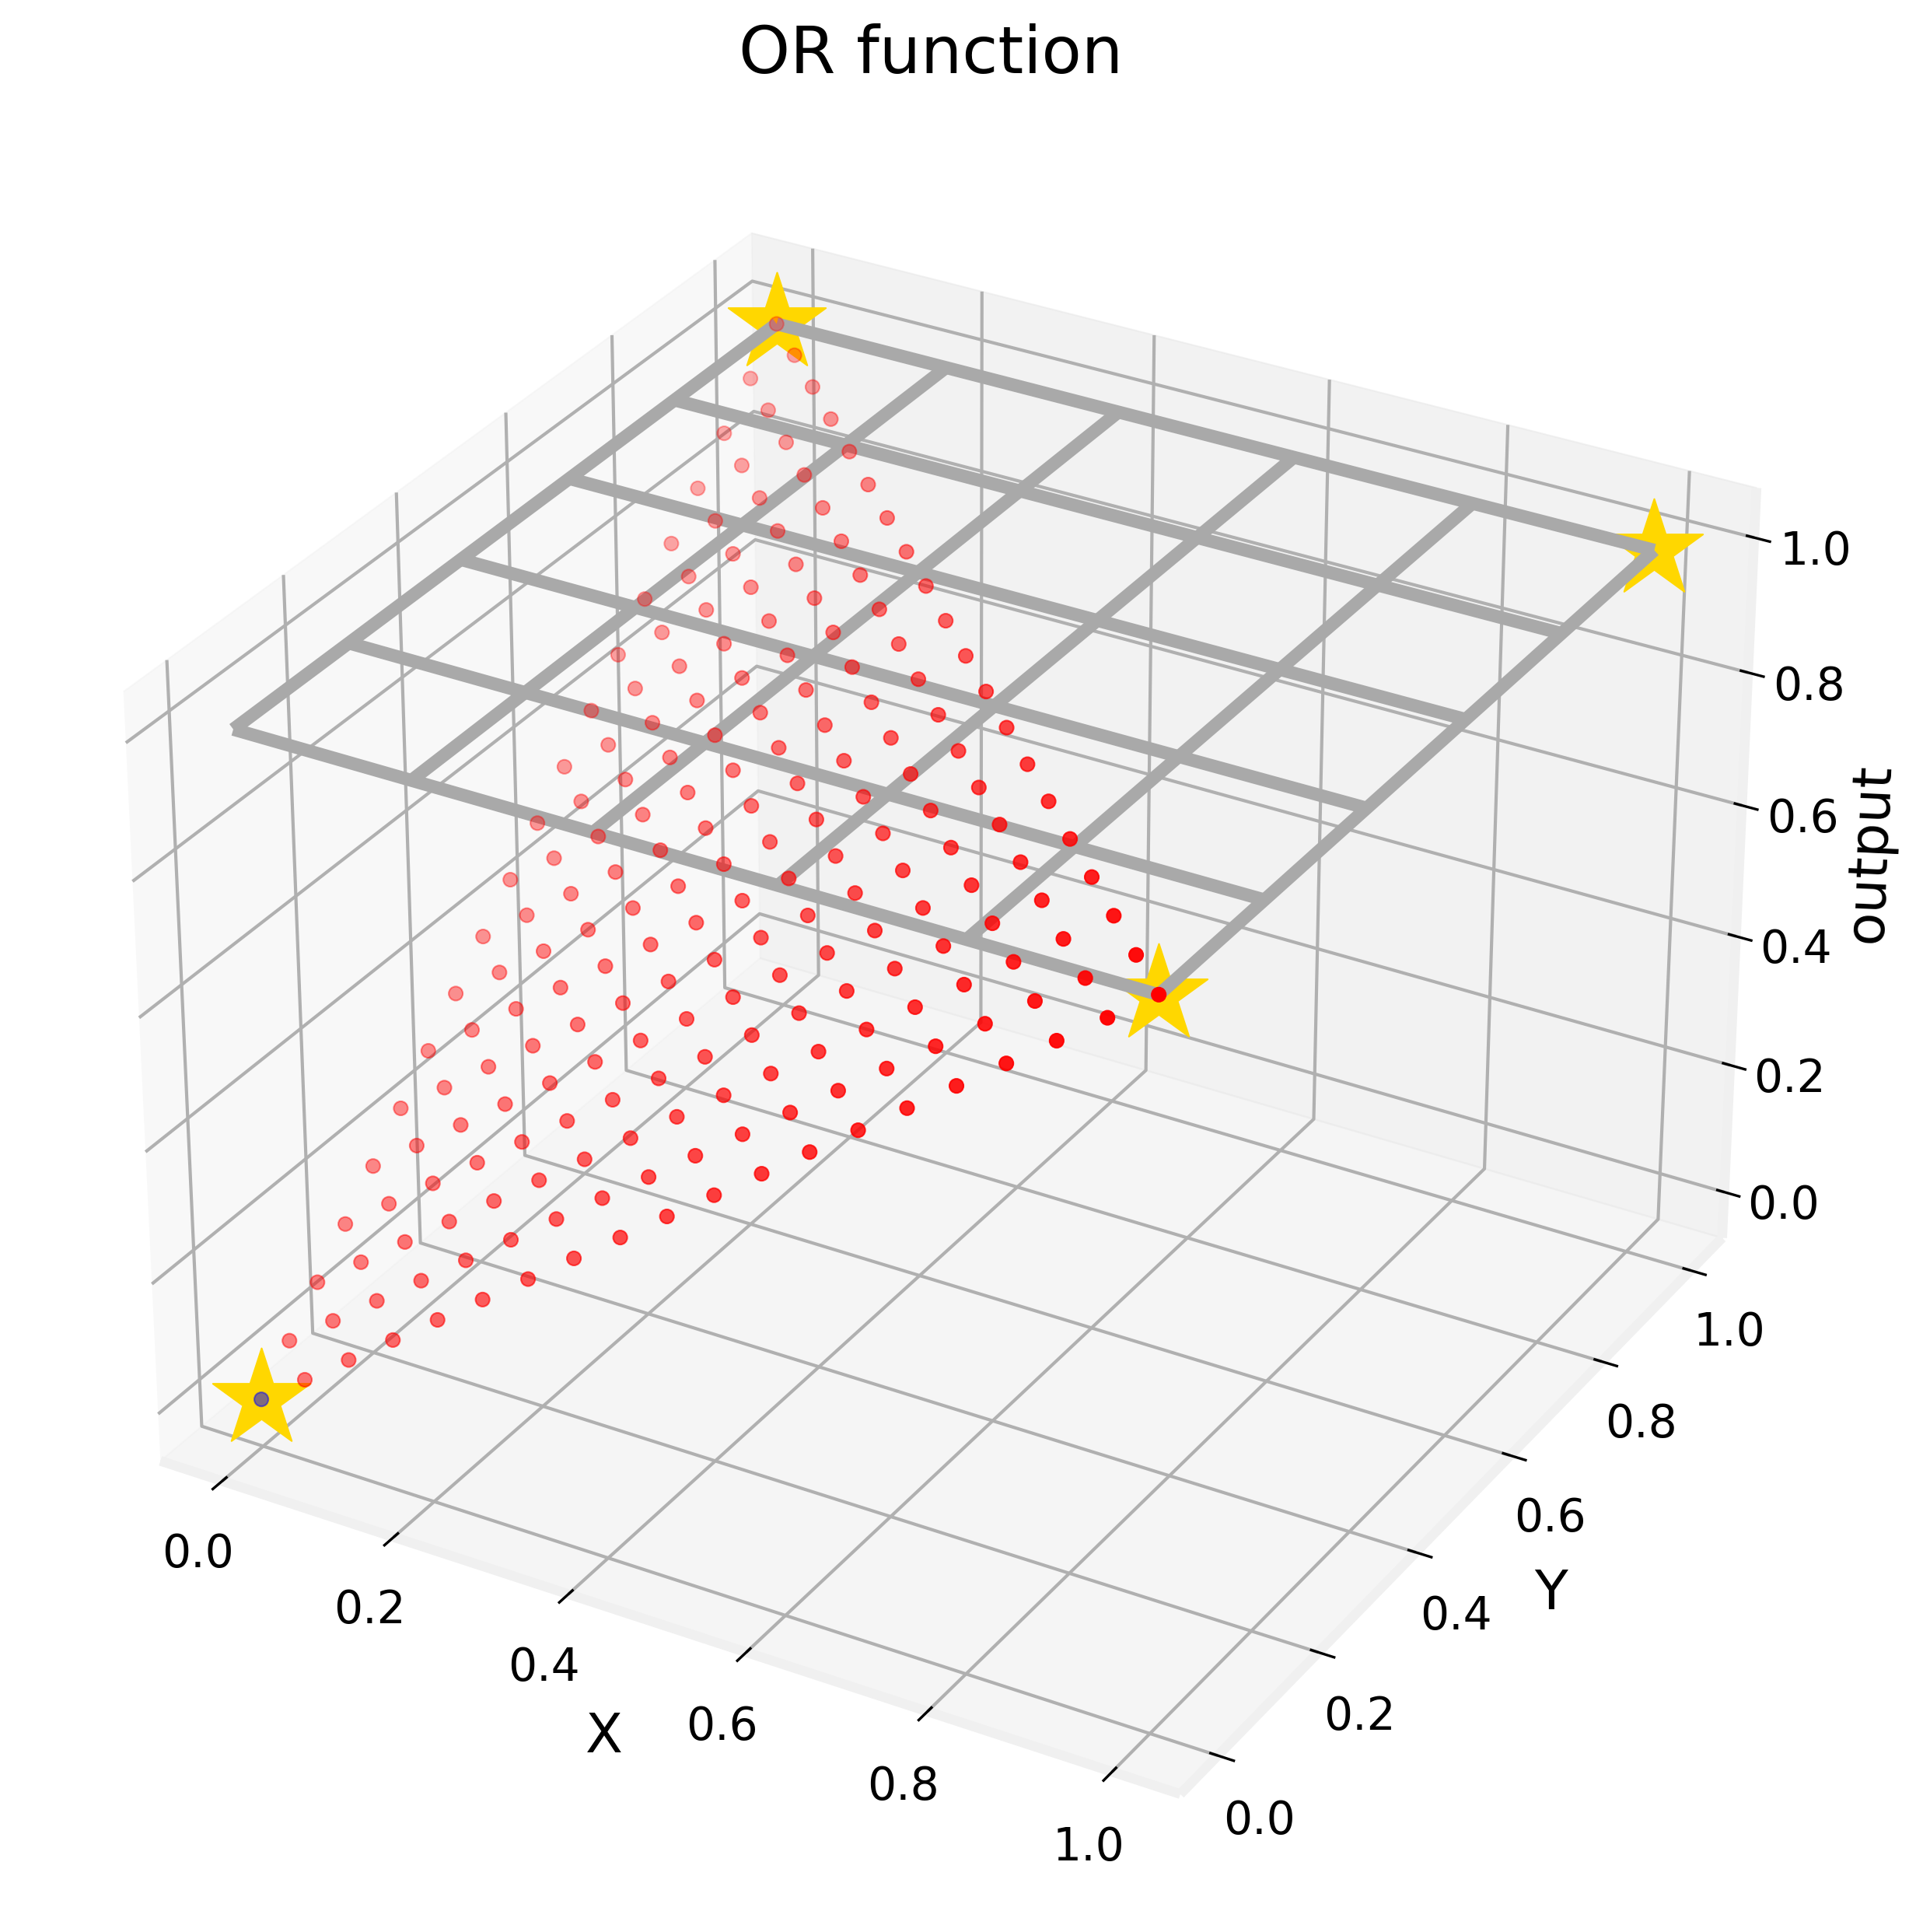

In [26]:
plot_output(weights_OR, X, y_OR, 1, 'OR function')

## XOR Function

What if we want an XOR operator instead? We already saw that a single perceptron isn't able to learn it, but perhaps we can combine multiple operators.

From boolean logic, we know that:

In [27]:
y_XOR = [0, 0, 0, 1]

And that we can write: $XOR(x, y)=(x~AND~y)~OR~(NOT~x~AND~NOT~y)$

So we split out calculations into multiple parts. The original input is:

In [28]:
X

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.]])

The first parenthesis is just:

In [29]:
X1 = predict(weights_AND, X)

The input for the second parenthesis is

In [30]:
X_NOT = X.copy()
X_NOT[:, 1] = predict(weights_NOT, X_NOT[:, [0, 1]])
X_NOT[:, 2] = predict(weights_NOT, X_NOT[:, [0, 2]])

In [31]:
X_NOT

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

And the second parenthesis is then

In [32]:
X2 = predict(weights_AND, X_NOT)

In [33]:
X2

array([0, 0, 0, 1])

Combining these two outputs into an input matrix:

In [34]:
X3 = X.copy()
X3[:, 1] = X1
X3[:, 2] = X2

And finally

In [35]:
XOR = predict(weights_OR, X3)

In [36]:
XOR

array([1, 0, 0, 1])

As expected!

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>